# Computer session 2

The goal of this computer class is to get a good feel of the Newton method and its
variants. In a (maybe) surprising way, we actually start with the dichotomy method
in the one-dimensional case.

## The dichotomy method in the one-dimensional case

When trying to solve the equation $\phi(x) = 0$ in the one-dimensional case, the
most naive method, which actually turns out to be quite efficient, is the dichotomy
method. Namely, starting from an initial pair $(a_L , a_R ) \in \mathbb{R}^2$ with $a_L < a_R$ such
that $\phi(a_L)\phi(a_R)<0$, we set $b ∶=\frac{a_L+a_R}{2}$. If $\phi(b) = 0$, the algorithm stops. If
$\phi(a_L)\phi(b) < 0$ we set $a_L\to a_L$ and $a_R \to b$. In this way, we obtain a linearly
converging algorithm. In particular, it is globally converging.


Write a function `Dichotomy(phi,aL,aR,eps)` that take sas argument
a function `phi`, an initial guess `aL,aR` and a tolerance `eps` and that runs the dichotomy
algorithm. Your argument should check that the condition $\phi(a_L)\phi(a_R) < 0$ is satisfied,
stop when the function `phi` reaches a value lower than `eps` and return the number
of iteration. Run your algorithm on the function $f = tanh$ with initial guesses
$a_L = −20$ , $a_R = 3$.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Dichotomy(phi, aL, aR, eps):
    n_iter = 0
    b = (aL + aR) / 2
    if aR <= aL or phi(aL) * phi(aR) >= 0:
        return ValueError("aR and aL are not valid")
    while phi(b) != 0 and aR - aL > eps:
        n_iter += 1
        b = (aL + aR) / 2
        if phi(aL) * phi(b) < 0:
            aR = b
        else:
            aL = b
    return n_iter

Dichotomy(np.tanh,-20,3,1e-8)

32

## Solving one-dimensional equation with the Newton and the secant method

We work again in the one-dimensional case with a function φ we want to find the
zeros of.

### Newton method

Write a function `Newton(phi,dphi,x0,eps)` that takes, as arguments, a function
`phi`, its derivative `dphi`, an initial guess `x0` and a tolerance `eps`
and that returns an approximation of the solutions of the equation $\phi(x) = 0$. The
tolerance criterion should again be that $|\phi| ≤\text{\texttt{eps}}$. Your
algorithm should return an error message in the following cases:
1. If the derivative is zero (look up the `try` and `except` commands in Python).
2. If the method diverges.

Apply this code to the minimisation of $x\mapsto \ln(e^x + e^{−x})$, with initial condition `x0=1.8`.
Compare this with the results of Exercise 3.10.

In [ ]:
def Newton(phi,dphi,x0,eps=1e-10):
    n_iter = 0
    x = x0
    while phi(x) != 0 and abs(phi(x)) > eps:
        try:
            dphi(x) == 0
        except ZeroDivisionError:
            return "division by zero"
        if n_iter > 10_000 or phi(x) == np.inf:
            return ValueError("Method diverges")
        else:
            x -= phi(x) / dphi(x)
            n_iter += 1
    return x, n_iter

def f(x):
    return np.log(np.exp(x) + np.exp(-x))

def df(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

Newton(f,df,1.8,1e-8)

<ipython-input-41-4dd8408a299f>:17: RuntimeWarning: overflow encountered in exp
  return np.log(np.exp(x) + np.exp(-x))
<ipython-input-41-4dd8408a299f>:20: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
<ipython-input-41-4dd8408a299f>:20: RuntimeWarning: invalid value encountered in scalar divide
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


ValueError('Method diverges')

### Secant method

Write a function `Secant(phi,x0,x1,eps)` that takes, as arguments, a function `phi`, two initial positions `x0`, `x1` and a tolerance
`eps` and that returns an approximation of the solutions of the equation
$\phi(x) = 0$. The tolerance criterion should again be that $|\phi| ≤\text{\texttt{eps}}$. Apply this code to the minimisation
of $x\mapsto \ln(e^x + e^{−x})$, with initial conditions `x0=1`, `x1=1.9`, then
`x0=1`, `x1=2.3` and
`x0=1`, `x1=2.4`. Compare with the results of Exercise 3.10.

In [ ]:
def Secant(phi,x0,x1,eps=1e-10):
    n_iter = 0
    x = x0
    y = x1
    while phi(y) != 0 and abs(phi(y)) > eps:
        try:
            phi(y) - phi(x) == 0
        except ZeroDivisionError:
            return "division by zero"
        if n_iter > 10_000:
            return ValueError("Method diverges")
        else:
            n_iter += 1
            save_y = y
            y -= (y - x) / (phi(y) - phi(x)) * phi(y)
            x = save_y
    return x,y, n_iter

def f(x):
    return np.log(np.exp(x) + np.exp(-x))

for x1 in [1.9,2.3,2.4]:
    print(Secant(f,1.8,x1,1e-8))

Method diverges
Method diverges
Method diverges


## Combining dichotomy and the Newton method

A possibility to leverage the advantages of dichotomy (the global convergence of
the method) and of the Newton method (the quadratic convergence rate) is to
combine both: start from an initial interval `[aL,aR]` of length `InitialLength`
with $\phi(a_L)\phi(a_R)<0$ and fix a real
number $s \in [0; 1]$. Run the dichotomy algorithm until the new interval is of length
`s*InitialLength`. From this point on, apply the Newton method.

Implement this algorithm with `s = 0.1`. Include a possibility to switch
back to the dichotomy method if, when switching to the Newton method, the new
iterate falls outside of the computed interval `[aL,aR]`. Apply this to the minimisation
of the function $f ∶ x\mapsto \ln(e^x + e^{−x})$ with an initial condition that made the Newton
method diverge. What can you  say about the number of iterations?

In [ ]:
def Dichotomy_Newton(phi, dphi, aL, aR, s=0.1, eps=1e-10):
    n_iter = 0
    IntialLength = aR - aL
    b = (aL + aR) / 2
    while phi(b) != 0 and aR - aL > s * IntialLength:
        n_iter += 1
        b = (aL + aR) / 2
        if phi(aL) * phi(b) < 0:
            aR = b
        else:
            aL = b
    n_iter2 = n_iter
    x0 = (aL + aR) / 2
    while phi(x0) != 0 and abs(phi(x0)) > eps:
        try:
            dphi(x0) == 0
        except ZeroDivisionError:
            return "division by zero"
        n_iter2 += 1
        if n_iter2 > 10_000 or phi(x0) == np.inf:
            return ValueError("Method diverges")
        else:
            x0 -= phi(x0) / dphi(x0)
            n_iter2 += 1
    return x0, n_iter2


def df(x):
  return(np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

print(Dichotomy_Newton(f,df,-20,3))

Method diverges


<ipython-input-42-42fd062c4f1e>:20: RuntimeWarning: overflow encountered in exp
  return np.log(np.exp(x) + np.exp(-x))
<ipython-input-43-36782656c288>:29: RuntimeWarning: overflow encountered in exp
  return(np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
<ipython-input-43-36782656c288>:29: RuntimeWarning: invalid value encountered in scalar divide
  return(np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


## Solving an optimisation problem using the Newton method

An island (denoted by a point $I$ below) is situated 2 kilometers from the shore (its projection on the shore
is a point $P$). A guest staying at a nearby hotel $H$ wants to go from the hotel to the
island and decides that he will run at 8km/hr for a distance $x$, before swimming at
speed 3km/hr to reach the island.

illustration of the problem

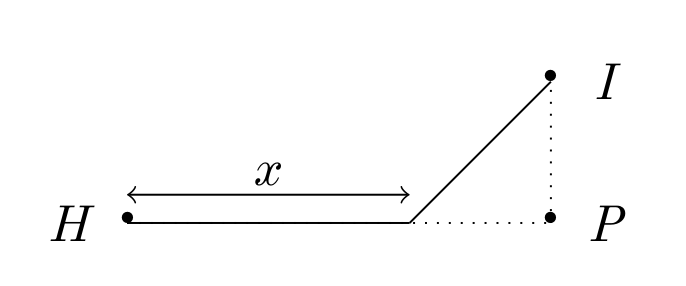



Taking into account the fact that there are 6 kilometers between the hotel $H$ and $P$,
how far should the visitor run before swimming?

Model the situation as a minimisation problem, and solve it numerically.
Compare the efficiency of the dichotomy method and of the Newton algorithm.

In [ ]:
def u(x):
  return np.sqrt((x**2 -12*x + 40))/3

def temps(x):
  return x/8 + u(x)

def grad_f(x):
  return 1/8 + (2*x - 12)/(6*u(x))

def Hess_f(x):
  return(12*u(x) - (2*x - 12)**2 / (12*u(x)))/(36*u(x)**2)


Newton(grad_f,Hess_f,4)

(np.float64(5.748023684687787), 6)

## The Newton method to solve boundary value problems

### Shooting method

We consider the following non-linear ODE

\begin{equation}
y''= f(x,y,y'),\quad x\in[a,b],\quad y(a)=\alpha, y(b)=\beta.
\end{equation}


To classically integrate such an ODE, we usually don’t have endpoints for $y$,
but initial values for $y$ and $y'$. So, we cannot start at $x=a $ and integrate
up to $x=b$. This is a _boundary value problem_.

One approach is to approximate $y$ by somme finite difference and then arrive at
a system for the discrete values $y(x_i)$ and finally solve large linear
systems.

Here, we will see how we can formulate the problem as a _shooting_ method, and
use Newton method so solve it.

The idea is to use a _guess_ for the initial value of $y'$. Let $s$ be a
parameter for a fonction $y(\;\cdot\;;s)$ solution of (1) such that
$$y(a;s)=\alpha,\text{ and }y'(a;s)=s.$$

There is no chance that $y(b;s)=y(b)=\beta$ but we can adjust the value of $s$,
refining the guess until it is (nearly equal to) the right value.

This method is known as _shooting_ method in analogy to shooting a ball at a
goal, determining the unknown correct velocity by throwing it too fast/too
slow until it hits the goal exactly.

#### In Practice

For the parameter $s$, we integrate the following ODE:

\begin{equation}
y''= f(x,y,y'),\quad x\in[a,b],\quad y(a)=\alpha, y'(a)=s.
\end{equation}

We denote $y(\;\cdot\;;s)$ solution of (2).

Let us now define the _goal function_. Here, we want that $y(b;s)=\beta$, hence,
we define:
$$g:s\mapsto \left.y(x;s)\right|_{x=b}-\beta$$

We seek $s^*$ such that $g(s^*)=0$.

Note that computing $g(s)$ involves the integration of an ODE, so each
evaluation of $g$ is  expensive. Newton’s method seems then to be a good
way due to its fast convergence.

To be able to code a Newton’s method, we need to compute the derivative of $g$.
For this purpose, let define
$$z(x;s)=\frac{\partial y(x;s)}{\partial s}.$$

Then by differentiating (2) with respect to $s$, we get
$$z''=\frac{\partial f}{\partial y}z+\frac{\partial f}{\partial y'}z',\quad
z(a;s)=0,\text{ and }z'(a;s)=1.$$

The derivative of $g$ can now be expressed in term of $z$:
$$g'(z)=z(b;s).$$

Putting this together, we can code the Newton's method:
$$s_{n+1}=s_n-\frac{g(s_n)}{g'(s_n)}.$$

To sum up, a shooting method requires an ODE solver and a Newton solver.

#### Example

Apply this method to
$$y''=2y^3-6y-2x^3,\quad y(1)=2,y(2)=5/2,$$
with standard library for integration, and your own Newton implementation.

Note that you may want to express this with one order ODE. Moreover, it may be
simpler to solve only one ODE for both $g$ and $g'$.

With python, you can use `scipy.integrate.solve_ivp` function:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

Plot the solution $y$.

For numerical parameters, compute the solution up to a precision of $10^{-8}$
and get the function on a grid of 1000 points.

## Finite differences

Here, we are going to use a different approach to solve the boundary value
problem:

\begin{equation}
y''= f(x,y,y'),\quad x\in[a,b],\quad y(a)=\alpha, y(b)=\beta.
\end{equation}

This problem can be solved by the following direct process:

1. We discretize the domain choosing an integer $N$, grid points $\{x_n\}_{n=0,\dots,N}$ and
   we define the discrete solution $\{y_n\}_{n=0,\dots,N}$.
1. We discretize the ODE using derivative approximation with finite differences
   in the interior of the domain.
1. We inject the boundary conditions (here $y_0=\alpha$ and $y_N=\beta$) in the
   discretized ODE.
1. Solve the system of equation for the unknows $\{y_n\}_{n=1,\dots,N-1}$.

We use here a uniform grid :
$$h:=(b-a)/N, \quad \forall n=0,\dots, N\quad x_n=hn.$$
If we use a centered difference formula for $y''$ and $y'$, we obtain:
$$\forall n=1,\dots,N-1,\quad \frac{y_{n+1}-2y_n+y_{n-1}}{h^2}=f\left(x_n,y_n,\frac{y_{n+1}-y_{n-1}}{2h}\right).$$

The result is a system of equations for $\mathbf{y}=(y_1,\dots,y_{N-1})$ :
$$G(\mathbf{y})=0,\quad G:\mathbb{R}^{N-1}\to\mathbb{R}^{N-1}.$$

This system can be solved using Newton's method. Note that the Jacobian
$\partial G/\partial \mathbb{y}$ is _tridiagonal_.

Of course, here, we are in the multidimensional context, so you will have to
code a Newton algorithm well suited.

#### Example

Apply this method to
$$y''=2y^3-6y-2x^3,\quad y(1)=2,y(2)=5/2.$$

Plot the solution $y$.

For numerical parameters, compute the solution up to a precision of $10^{-8}$
and get the function on a grid of 1000 points.

**Remark:** In the context of numerical optimal control, these two numerical
methods are often called _indirect method_ (for the shooting method) and _direct
method_ (for the finite difference method).

## Who’s the best?

Compare the two methods playing with parameters (grid discretization, precision,
initialization, etc.). Mesure the time computation.